## Exploratory Data Analysis of Haberman dataset

Haberman Dataset: [https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1]
* The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings   Hospital on the survival of patients who had undergone surgery for breast cancer.
##### Objective: To predict the survival status of the patient based on the 3 features.




In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")



In [3]:
# (Q) how many data-points and features?
print (haberman.shape)

(306, 4)


In [4]:
#(Q) What are the column names in our dataset?
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


##### In haberman dataset we have three Features and one class i.e. Status.
###### Column Description
* Age--Age of patient at time of operation.
* Year--Year of operation.
* Nodes--Number of nodes.
* Status--1=Alive for more than 5 years , 2=Dead within 5 years.

##### Checking data points for each class of Haberman and from output we can conclude that :
Haberman dataset is an imbalanced dataset as 225 rows have status as 1 and 81 rows have status as 2.

In [6]:
#(Q) How many data points for each class are present? 

haberman["status"].value_counts()
# balanced-dataset vs imbalanced datasets

1    225
2     81
Name: status, dtype: int64

In [5]:
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## Univariate Analysis

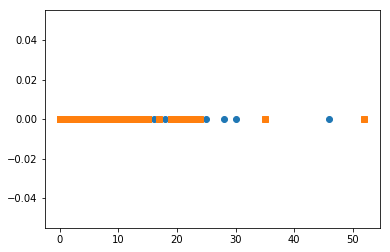

In [6]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of nodes
import numpy as np
alive = haberman.loc[haberman["status"] == 1];
dead = haberman.loc[haberman["status"] == 2];


plt.plot(alive["nodes"], np.zeros_like(alive['nodes']), 'o')

plt.plot(dead["nodes"], np.zeros_like(dead['nodes']), 's')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

### Histogram, PDF, CDF

In [79]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?


# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


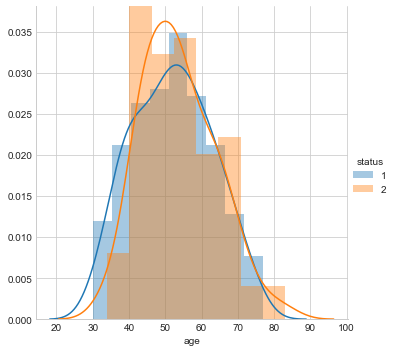

In [41]:
import warnings
warnings.filterwarnings("ignore")

sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();



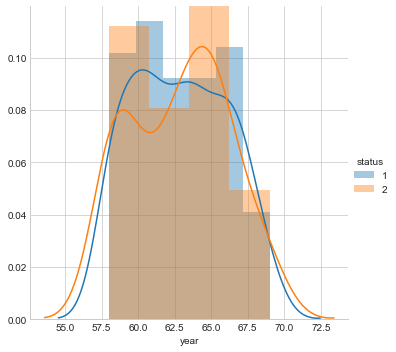

In [42]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

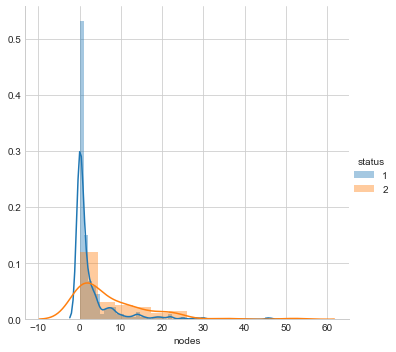

In [43]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

Observations:
From the histogram where node is a feature there is a high probability that the patient may survive if the number of nodes are less and as the nodes increase the survival chances are decreased.

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


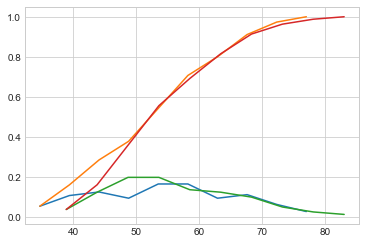

In [78]:

# Need for Cumulative Distribution Function (CDF)
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of age

counts, bin_edges = np.histogram(alive['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(dead['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.show();


[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


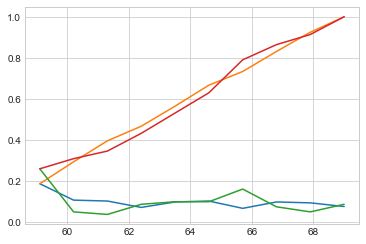

In [75]:

counts, bin_edges = np.histogram(alive['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(dead['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


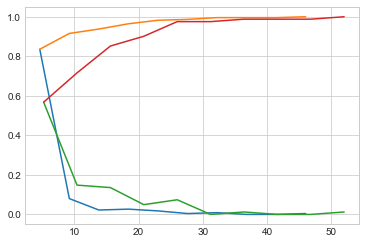

In [74]:

counts, bin_edges = np.histogram(alive['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(dead['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

### Box plot and Whiskers

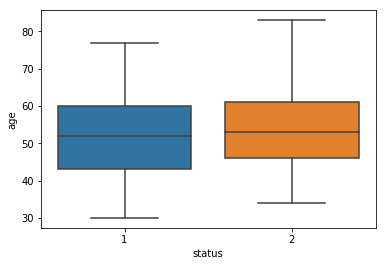

In [34]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.


sns.boxplot(x='status',y='age', data=haberman)
plt.show()

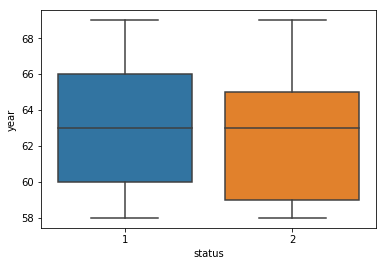

In [35]:
sns.boxplot(x='status',y='year',data=haberman)
plt.show()

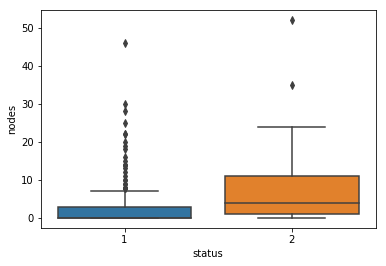

In [36]:
sns.boxplot(x='status',y='nodes',data=haberman)
plt.show()

### Violin plots

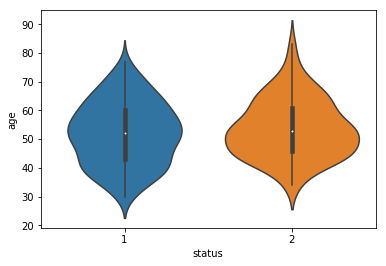

In [37]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.show()

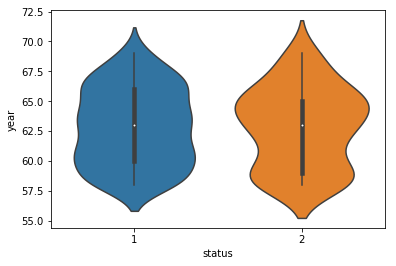

In [38]:
sns.violinplot(x="status", y="year", data=haberman, size=8)
plt.show()

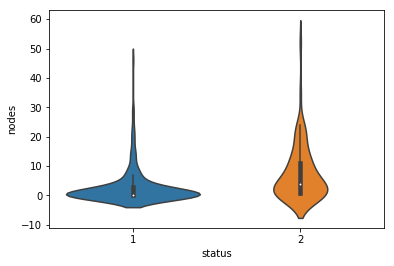

In [39]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.show()

## Multi Variate Analysis

### 2-D Scatter Plot

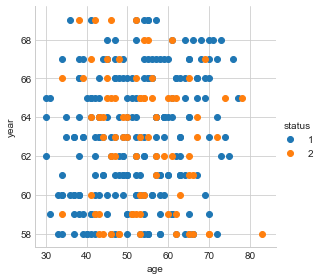

In [17]:
# 2-D Scatter plot with color-coding for each class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.show();


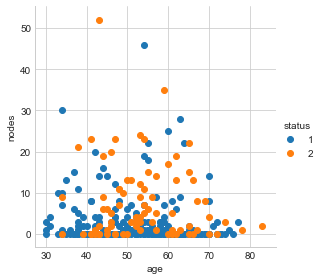

In [40]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

**Observation(s):**
1. Using age and nodes as feature we can find more patients as alive where the age is in between 50 and 60 and the number of nodes is less than approximately 5.

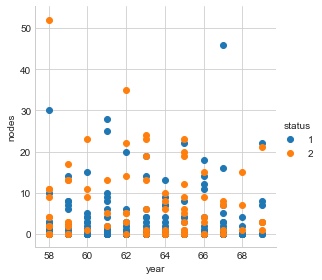

In [41]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.show();

### Pair-plot

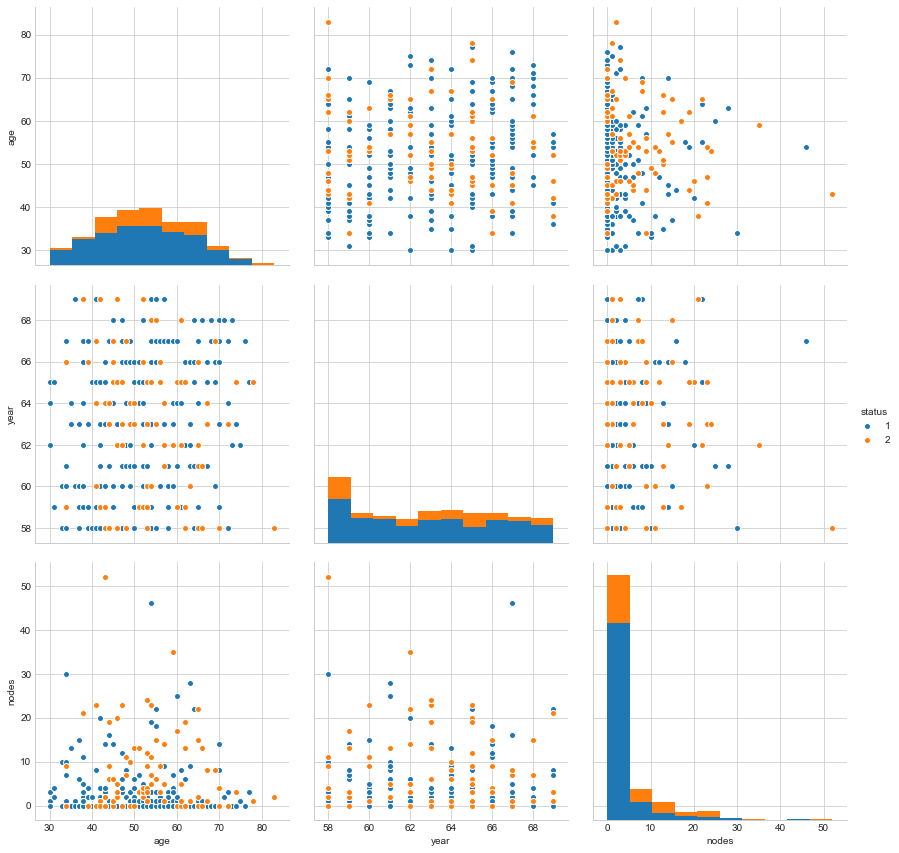

In [20]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=4,vars=['age','year','nodes']);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

### Contour plot


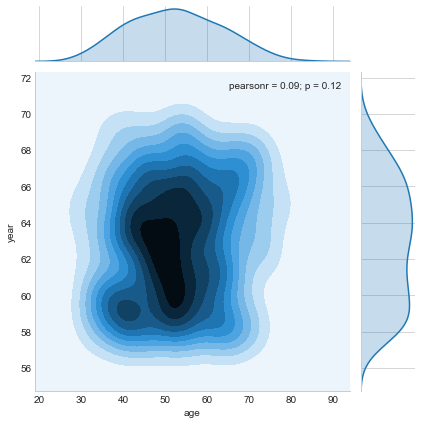

In [66]:
sns.jointplot(x="age", y="year", data=haberman, kind="kde");
plt.show();


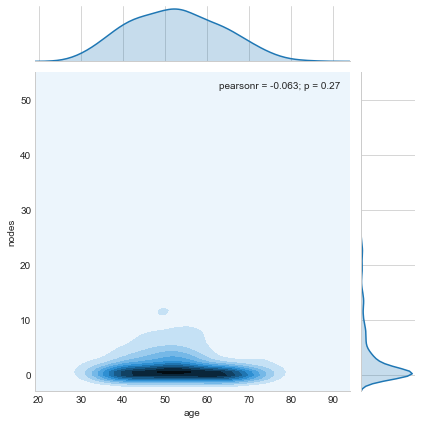

In [67]:
sns.jointplot(x="age", y="nodes", data=haberman, kind="kde");
plt.show();

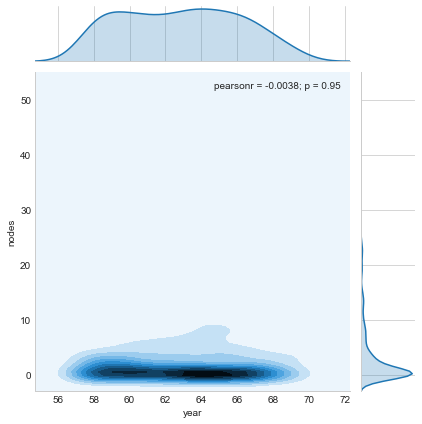

In [68]:
sns.jointplot(x="year", y="nodes", data=haberman, kind="kde");
plt.show();

## Conclusion:

1. From the Univariate analysis we found out that the age and year of operation does not play a major role in predecting the survival of the patient whereas the number of nodes feature is useful.
2. From CDF's we can say that there are some higher chances of survival like 20% if the age is less than 40 and 80% of chances if the number of nodes are less than 5.
* From the Bi variate analysis using age and nodes as feature we can find more patients are alive where the age is in between 50 and 60 and the number of nodes is less than approximately 5.
* So the best two features from which can predict the survival of patient are Age and Nodes.
* Although we may need some more relevant features to predict accurately.